In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [30]:
# Loaging image
image = cv2.imread('../Images/03-shey.jpg')

#Converting the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#resizing the image into 2D array of 3 colour values
pixel_vals = image.reshape((-1,3))

#Converting the pixels into float type
pixel_vals = np.float32(pixel_vals)

In [31]:
# number of clusters
k = (3,5,7)

# Termination criteria. (TYPE, MAX_ITER, EPSILON)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

segmented_image = []

In [32]:
for i in range(len(k)):
    retval, labels, centers = cv2.kmeans(pixel_vals, k[i], None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # converting data into 8-bit values
    centers = np.uint8(centers)

    # Mapping lables to center points (RGB values)
    segmented_data = centers[labels.flatten()]

    #reshapeing data into original image dimension
    segmented_image.append(segmented_data.reshape((image.shape)))

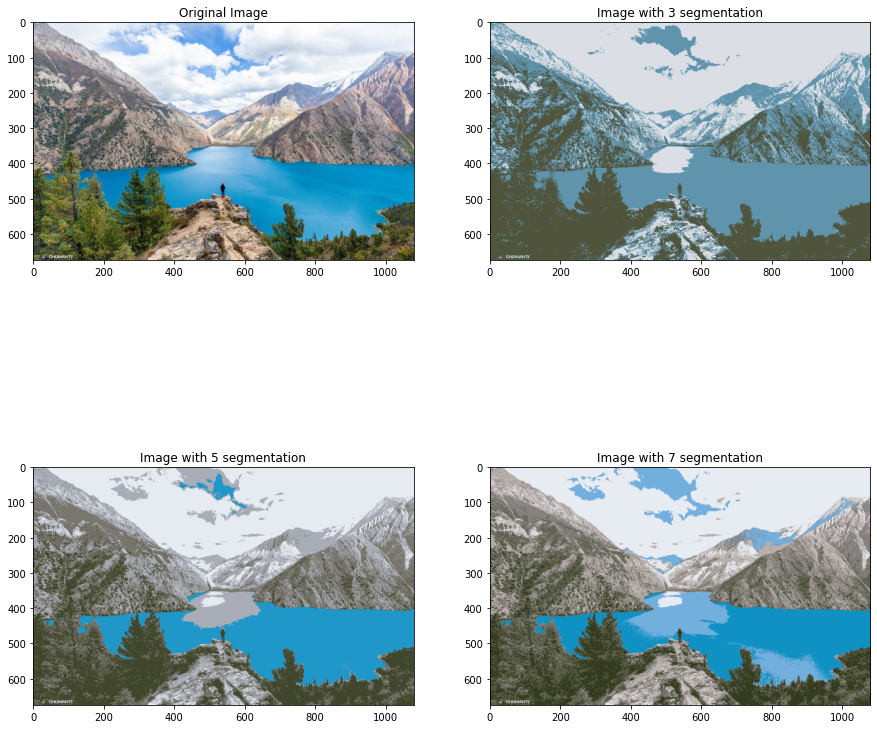

In [37]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].set_title('Original Image')
ax[0,0].imshow(image)

ax[0,1].set_title('Image with 3 segmentation')
ax[0,1].imshow(segmented_image[0])

ax[1,0].set_title('Image with 5 segmentation')
ax[1,0].imshow(segmented_image[1])

ax[1,1].set_title('Image with 7 segmentation')
ax[1,1].imshow(segmented_image[2])